# LGMVIP- DataScience

# Intermediate Level Task

# Task 2 - Prediction Using Decision Tree Algorithm

# Importing The Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

import warnings 
warnings.filterwarnings("ignore")

# Loading The DataSet

In [6]:
frm=pd.read_csv('Iris.csv')
frm.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Removing The Unwanted Column

In [7]:
#removing id column
frm= frm.drop(columns=['Id'])
frm.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Display The Details About DataSet

In [8]:
#to display the statistics about data
frm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#to display basic info about datatypes
frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#to display the number of samples on each class
frm['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [11]:
frm.shape

(150, 5)

# Preprocessing The DataSet

In [12]:
#checking for null values
frm.notnull().sum()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

# Data Visualization

In [13]:
#Scatter plot for each class
colors=["red","yellow","green"]
Species=["Iris-setosa","Iris-versicolor","Iris-virginica"]

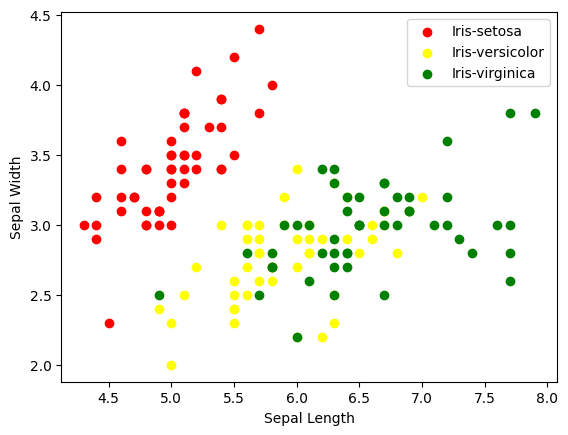

In [14]:
#Scatter plot for sepal length and width
for i in range(3):
    x=frm[frm["Species"]==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

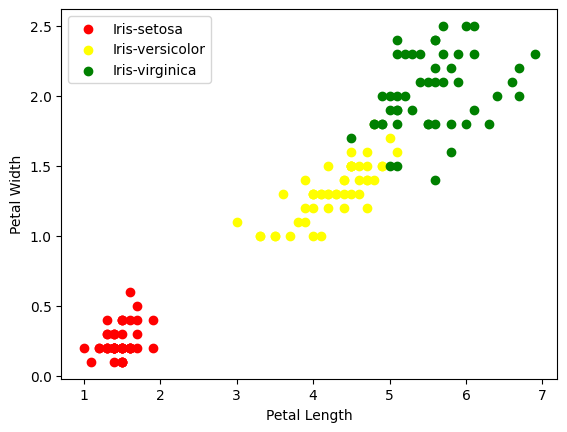

In [15]:
#Scatter plot for petal length and width
for i in range(3):
    x=frm[frm["Species"]==Species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=Species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

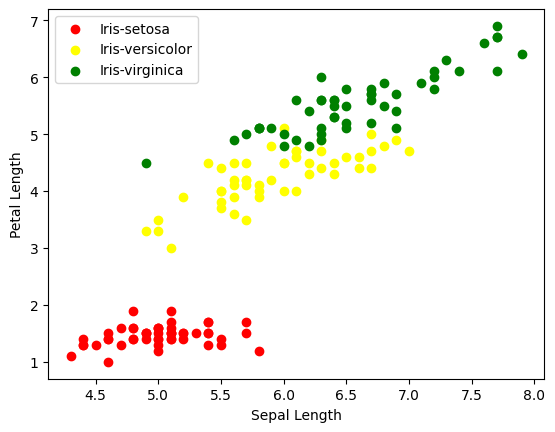

In [16]:
#Scatter plot for sepal length and petal length
for i in range(3):
    x=frm[frm["Species"]==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

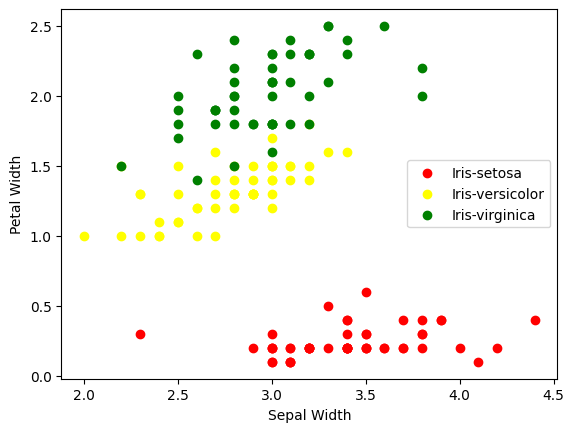

In [17]:
#Scatter plot for sepal and petal width
for i in range(3):
    x=frm[frm["Species"]==Species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=Species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [18]:
#correlation matrix
frm.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

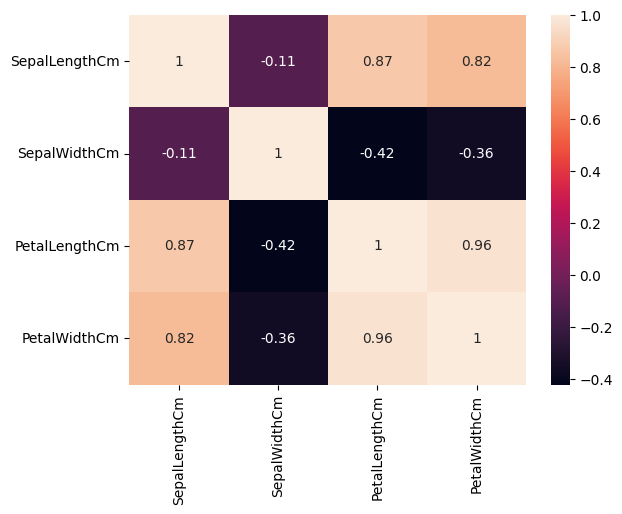

In [19]:
#representing correlation matrix in the form of heatmap
sns.heatmap(frm.corr(numeric_only=True),annot=True)

In [20]:
#Seperate the target features(X) and variable(y) 
target= frm['Species']
df1= frm.copy()
df1=df1.drop('Species',axis=1)

In [21]:
X=df1
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [22]:
#Encode the categorical variable to numeric value
#Label Encoding
le=LabelEncoder()
target=le.fit_transform(target)
y=target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
#splitting the data into training and test sets
#for training-70%
#for test-30%
x=frm.drop(columns=["Species"])
y=frm["Species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


# Modeling Tree And Testing It

In [24]:
#defining the decision tree classifier and fitting the training set
Dtree=DecisionTreeClassifier()
Dtree.fit(x_train,y_train)
print("Decision Tree Classifier Created")

Decision Tree Classifier Created


In [25]:
#Predicting the values of test data
y_pred=Dtree.predict(x_test)
print("CLassification Report : \n",classification_report(y_test,y_pred))

CLassification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



Text(0.5, 1.0, 'Accuracy Score:95.55555555555556')

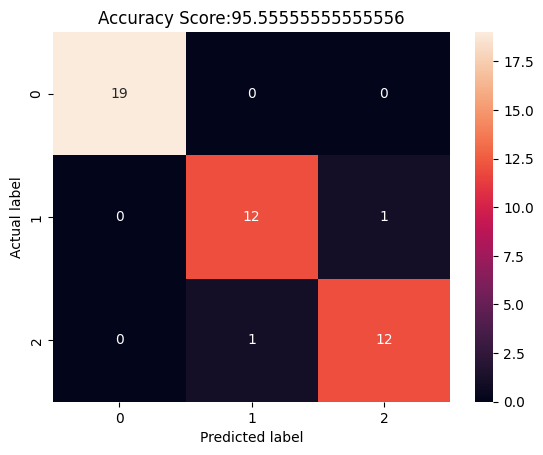

In [26]:
#Confusion Matrics 
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score:{0}'.format(Dtree.score(x_test,y_test)*100))

# Visualizing The Decision Tree

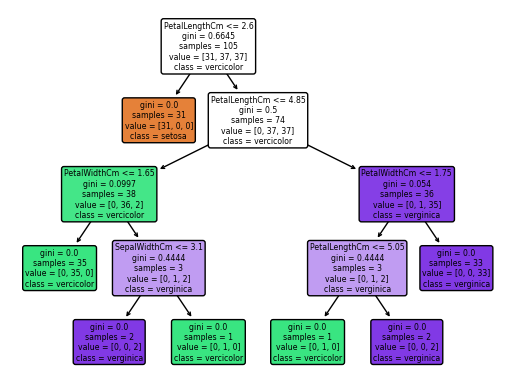

In [27]:
#visualizing the graph
dec_tree=plot_tree(decision_tree=Dtree,feature_names=df1.columns,class_names=["setosa","vercicolor","verginica"],filled = True,precision=4,rounded=True)

In [29]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred)*100)

Accuracy Score:  95.55555555555556


In [30]:
#0-Iris-Setosa
#1-Iris-Versicolor
#2-Iris-Verginaca
print(*Dtree.predict([[4.6,3.1,1.5,0.2]]))

Iris-setosa
